In [26]:
from PIL import Image as image
from PIL import ImageOps as ops
import os

In [7]:
os.getcwd()

'/home/ashirbad/GitHub/evolutionary_algo_gpu/codes'

In [24]:
path = "../data/pictures"
filename = "india-map-states-and-imp_cities.jpg"
map_with_cities = image.open(os.path.join(path,filename))

In [25]:
map_with_cities.size

(495, 611)

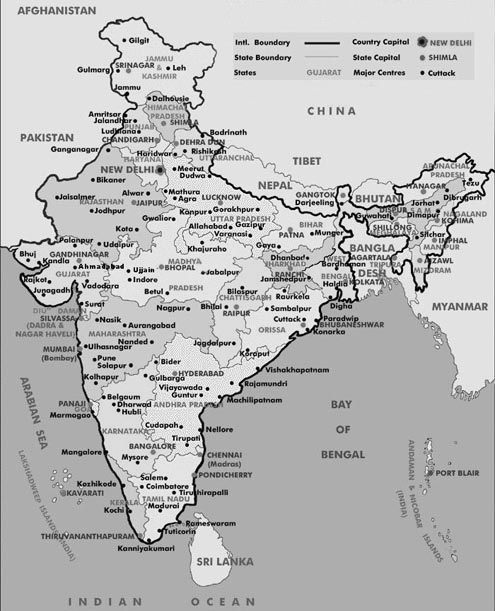

In [27]:
ops.grayscale(map_with_cities)